## Import needed libraries and load the data

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.decomposition import PCA

from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from pandas.plotting import scatter_matrix 

In [87]:
# Load the data from the .csv file
data = pd.read_csv('cleaned_descriptor_data',index_col=0)

# Scale the data with a standard scaling
scaling=MinMaxScaler()
scaling.fit(data)
scaled_data=scaling.transform(data)
df_data = pd.DataFrame(scaled_data, columns=data.columns)

# Choose the kinase of which you want to predict the inhibition
#selected_kinase = 'ERK2_inhibition'
selected_kinase = 'PKM2_inhibition'     # Or 'ERK2_inhibition'

# Define train and test data
X = df_data.drop(columns=['ERK2_inhibition','PKM2_inhibition']).copy()

y = data[selected_kinase].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

df_data.head()

,BertzCT,ExactMolWt,Kappa1,NOCount,BCUT2D_LOGPLOW,NumValenceElectrons,HeavyAtomCount,Chi2n,PEOE_VSA1,Kappa2,...,SMR_VSA7,NumAromaticCarbocycles,fr_benzene,BCUT2D_MRLOW,EState_VSA3,NumAromaticRings,Kappa3,PEOE_VSA2,ERK2_inhibition,PKM2_inhibition
0,0.057444,0.000000,0.006536,0.3,0.787421,0.034091,0.030303,0.083391,0.333026,0.057148,...,0.098137,0.00,0.00,0.832255,0.154529,0.166667,0.138979,0.00000,0.0,0.0
1,0.303564,0.224300,0.195206,0.1,0.824845,0.204545,0.212121,0.245095,0.265844,0.251314,...,0.410326,0.25,0.25,0.548368,0.221876,0.333333,0.260688,0.00000,0.0,0.0
2,0.015860,0.133852,0.269402,0.2,0.651839,0.181818,0.151515,0.175152,0.308813,0.653771,...,0.200256,0.00,0.00,0.349187,0.438632,0.000000,0.963729,0.33942,0.0,0.0
3,0.305872,0.183601,0.171245,0.3,0.530282,0.204545,0.212121,0.228487,0.291715,0.219362,...,0.460293,0.25,0.25,0.156960,0.213728,0.333333,0.152768,0.16971,0.0,0.0
4,0.214233,0.169924,0.185837,0.2,0.559453,0.159091,0.151515,0.161234,0.000000,0.266145,...,0.453900,0.00,0.00,0.658850,0.088735,0.166667,0.213160,0.49303,0.0,0.0


## Recursive Feature Elimination

In [48]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('Feature Selection', rfe), ('Model', model)])

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=10)
results = cross_validate(pipeline, X, y, scoring='balanced_accuracy', cv=cv, return_estimator=True)
n_scores = cross_validate(pipeline, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=1)

In [54]:
print(results)

{'fit_time': array([14.38133812, 15.30414867, 15.02575755, 14.56953168, 14.32905436,
       14.67854285, 14.90702057, 14.14955759, 14.55587125, 15.11822462,
       14.54239416, 15.12401485, 14.68300366, 15.75804758, 15.67486668,
       14.73632336, 15.38285136, 15.16284585, 15.02910781, 15.572088  ,
       15.10102701, 15.17579174, 14.69658208, 14.78389025, 14.98064232]), 'score_time': array([0.0081718 , 0.00802755, 0.01153755, 0.00666189, 0.00207925,
       0.01029015, 0.01163721, 0.00812244, 0.01022339, 0.01019764,
       0.0080452 , 0.00426555, 0.00185037, 0.01037645, 0.01015258,
       0.01019049, 0.00465155, 0.00511885, 0.01030374, 0.00800586,
       0.01899838, 0.00877833, 0.00700426, 0.00704122, 0.01114345]), 'estimator': [Pipeline(steps=[('Feature Selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=10)),
                ('Model', RandomForestClassifier())]), Pipeline(steps=[('Feature Selection',
                 RFE(est

In [49]:
print(n_scores)

{'fit_time': array([16.08362126, 15.67069602, 15.54667377, 15.0075314 , 14.96445274,
       14.49321723, 15.40621114, 14.64994073, 16.32658958, 15.98099589,
       16.03509355, 16.50696898, 16.6498549 , 15.41478729, 15.9958725 ,
       15.08579707, 14.95249701, 14.90745401, 15.30420876, 14.81012988,
       15.12388349, 14.62293744, 13.89295506, 14.67634702, 15.39852333]), 'score_time': array([0.00799704, 0.0129559 , 0.00943995, 0.00741792, 0.00708389,
       0.00995064, 0.00705719, 0.01061702, 0.01213431, 0.00932598,
       0.00807238, 0.01011658, 0.01075888, 0.01100039, 0.00862241,
       0.01021528, 0.00905752, 0.00700235, 0.00773215, 0.01094532,
       0.00862837, 0.00794959, 0.01093125, 0.00700569, 0.00892711]), 'test_score': array([0.5       , 0.5       , 0.5       , 0.5       , 0.49530516,
       0.5       , 0.5       , 0.5       , 0.49765258, 0.5       ,
       0.49765258, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.49

In [51]:
rfecv = RFECV(RandomForestClassifier())
pipeline = Pipeline(steps=[('Feature Selection',rfecv), ('Model',model)])

cv_rfecv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=10)
n_scores_1 = cross_val_score(pipeline, X, y, scoring='balanced_accuracy', cv=cv_rfecv, n_jobs=1)

In [53]:
n_scores_1

array([0.5       , 0.5       , 0.5       , 0.5       , 0.49530516,
       0.5       , 0.5       , 0.49765258, 0.5       , 0.5       ,
       0.49765258, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.49530516, 0.5       , 0.49765258, 0.5       , 0.49765258,
       0.49765258, 0.5       , 0.5       , 0.5       , 0.5       ])

In [75]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['MaxAbsEStateIndex', 'BCUT2D_MRHI', 'MinEStateIndex', 'BCUT2D_CHGLO',
       'BCUT2D_MRLOW'],
      dtype='object')


c:\Users\20223921\.conda\envs\AP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\20223921\.conda\envs\AP\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\20223921\.conda\envs\AP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\20223921\.conda\envs\AP\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like

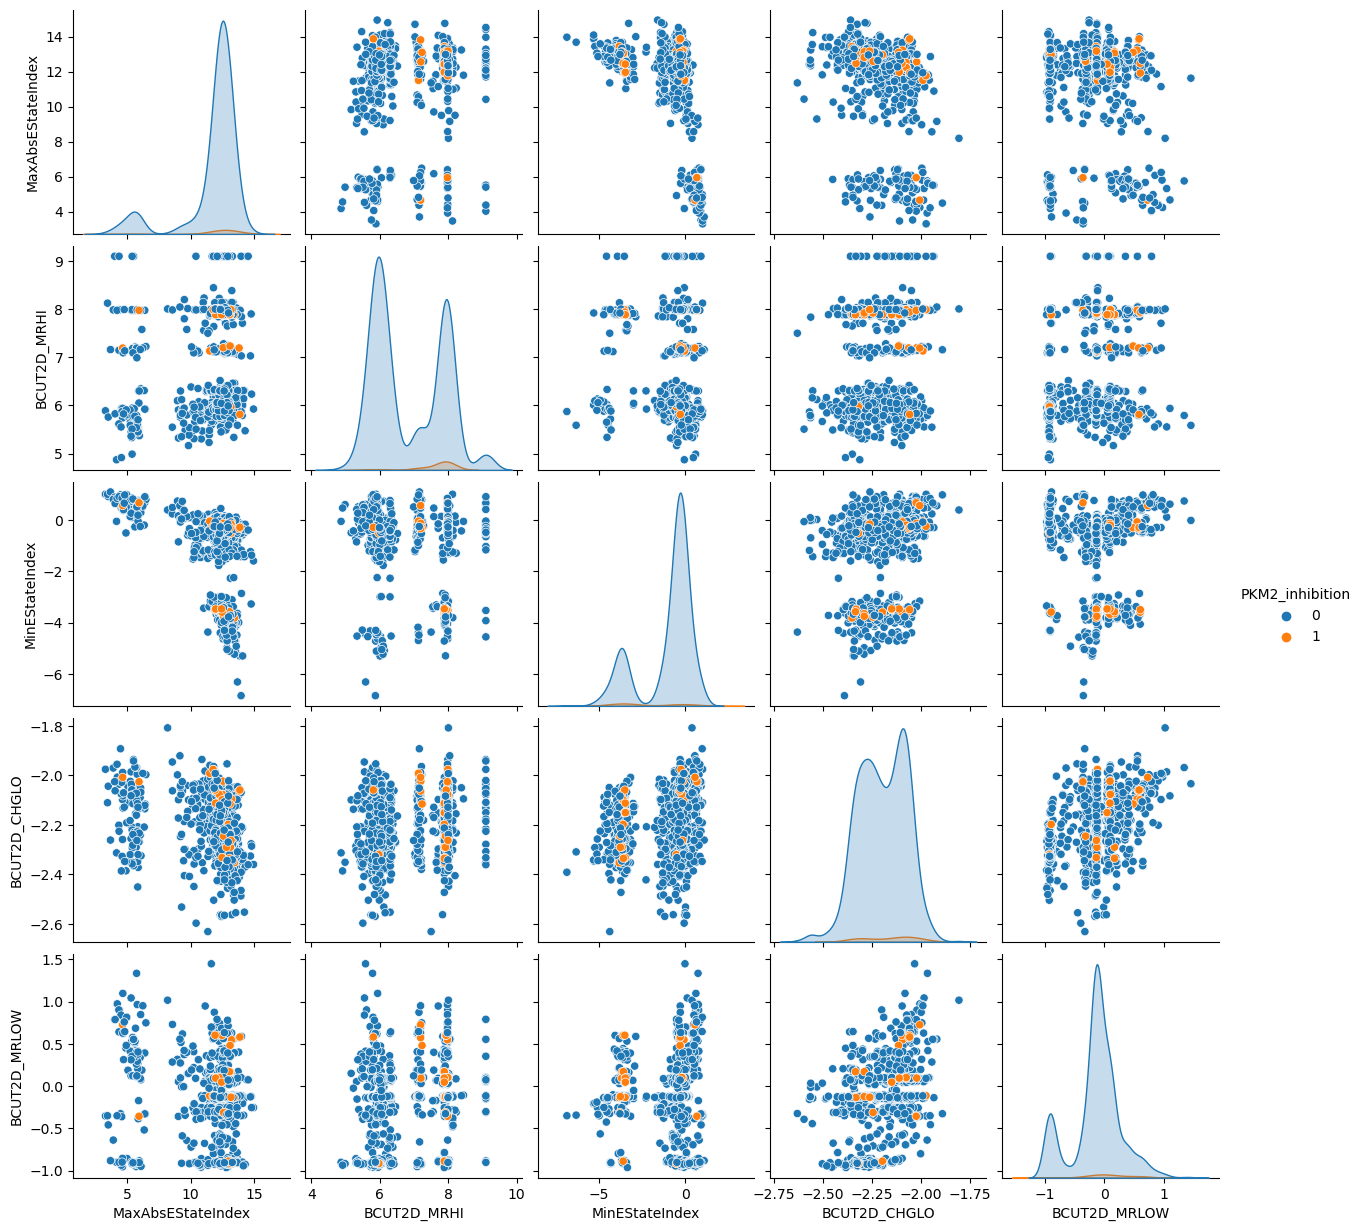

In [88]:
# Plot most important feature

#### NIET vergeten de target kinase (y) aan te passen bovenaan
sns.pairplot(data[['MaxAbsEStateIndex', 'BCUT2D_MRHI', 'MinEStateIndex', 'BCUT2D_CHGLO', 
                   'BCUT2D_MRLOW', selected_kinase]], hue=selected_kinase);